In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

C:\Users\vivek\anaconda4\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
insurance_data = pd.read_csv("./insurance.csv")

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.describe(include = 'all')


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

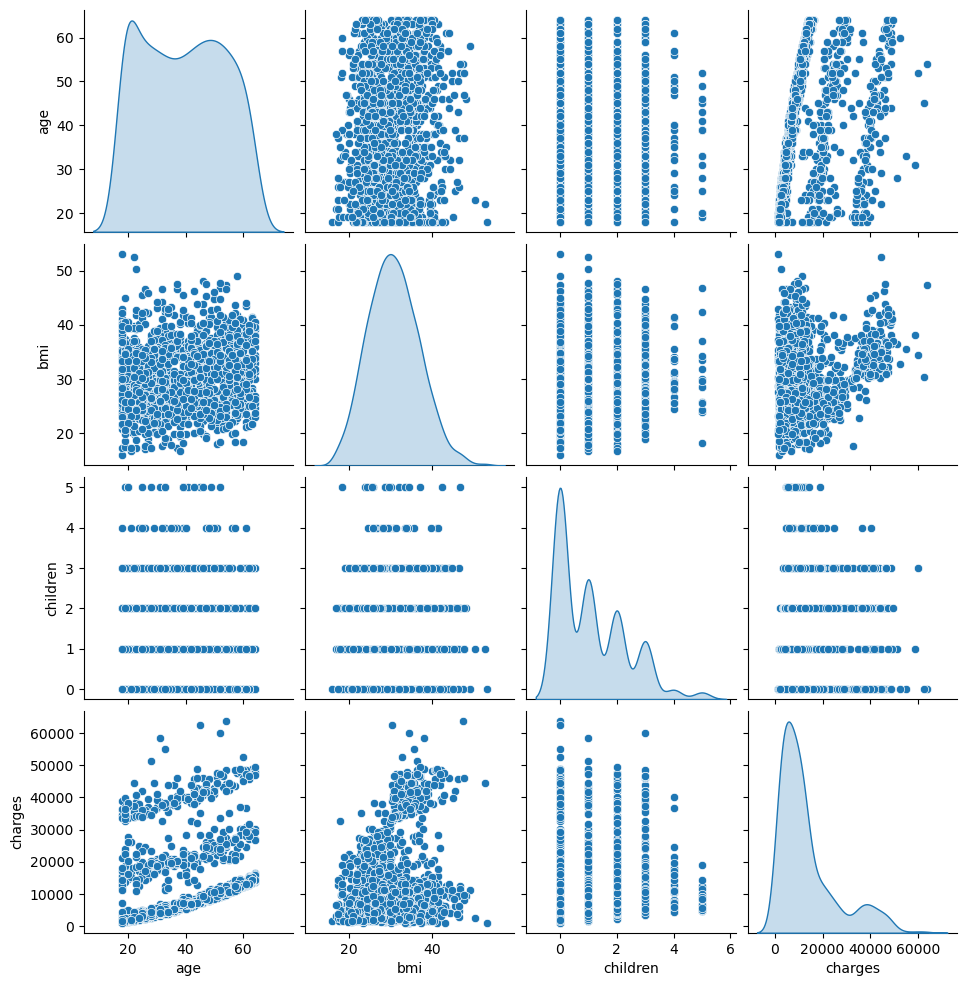

In [5]:
sns.pairplot(insurance_data[['age','bmi','children','charges']], diag_kind = 'kde')

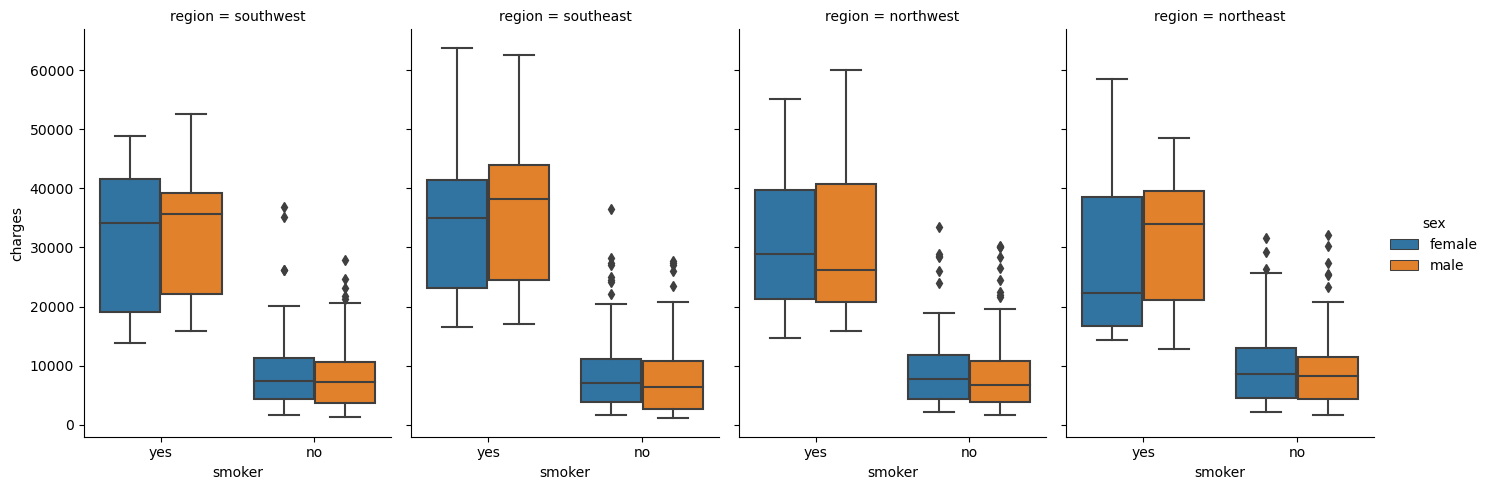

In [6]:
sns.catplot(x= 'smoker', y = 'charges', hue='sex',col = 'region', aspect= .7, kind = 'box' , data= insurance_data)

<Axes: xlabel='age', ylabel='charges'>

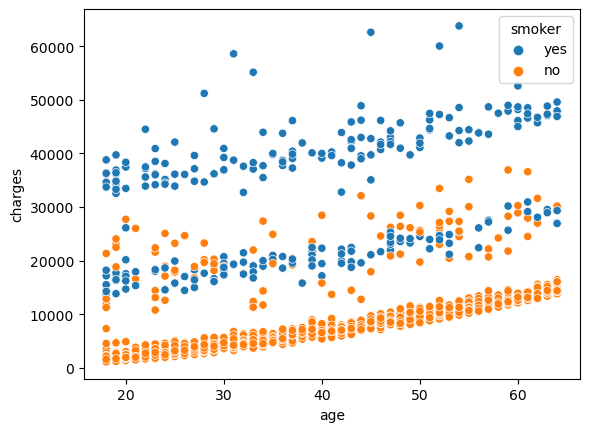

In [7]:
sns.scatterplot(x='age', y='charges' , data=insurance_data, hue ='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

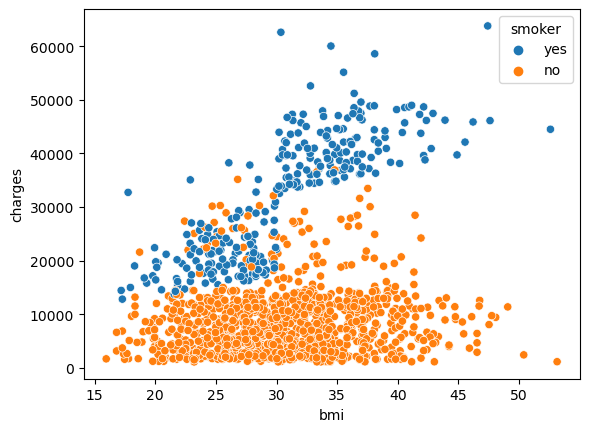

In [8]:
sns.scatterplot(x='bmi', y = 'charges', hue='smoker', data=insurance_data)

In [9]:
df = insurance_data.copy()
#create obese feature
df['obese'] = df['bmi'].map(lambda x: 1 if x> 30 else 0)

# Encode the sex and smoker columns
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Create the obese_smoker feature
df['obese_smoker'] = df.apply(
    lambda r: 'not-obese-non-smoker' if (r['smoker'] == 0) & (r['obese'] == 0) else (
        'obese-smoker' if (r['smoker'] == 1) & (r['obese'] == 1) else (
            'obese-non-smoker' if (r['smoker'] == 0) & (r['obese'] == 1) else 'not-obese-smoker'
        )
    ), axis=1
)

df  












,age,sex,bmi,children,smoker,region,charges,obese,obese_smoker
0,19,0,27.900,0,1,southwest,16884.92400,0,not-obese-smoker
1,18,1,33.770,1,0,southeast,1725.55230,1,obese-non-smoker
2,28,1,33.000,3,0,southeast,4449.46200,1,obese-non-smoker
3,33,1,22.705,0,0,northwest,21984.47061,0,not-obese-non-smoker
4,32,1,28.880,0,0,northwest,3866.85520,0,not-obese-non-smoker
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,1,obese-non-smoker
1334,18,0,31.920,0,0,northeast,2205.98080,1,obese-non-smoker
1335,18,0,36.850,0,0,southeast,1629.83350,1,obese-non-smoker
1336,21,0,25.800,0,0,southwest,2007.94500,0,not-obese-non-smoker


<Axes: xlabel='age', ylabel='charges'>

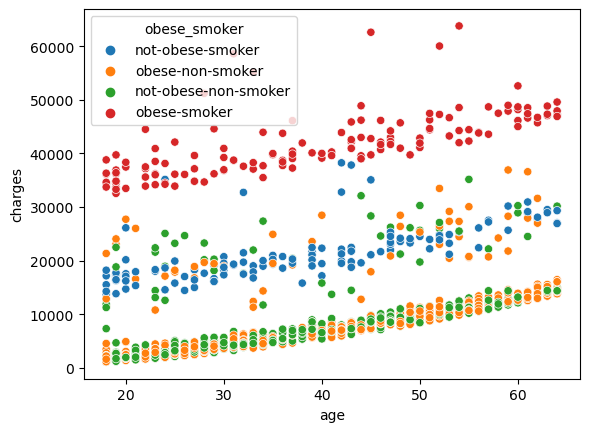

In [10]:
sns.scatterplot(x='age', y='charges', hue='obese_smoker', data= df)

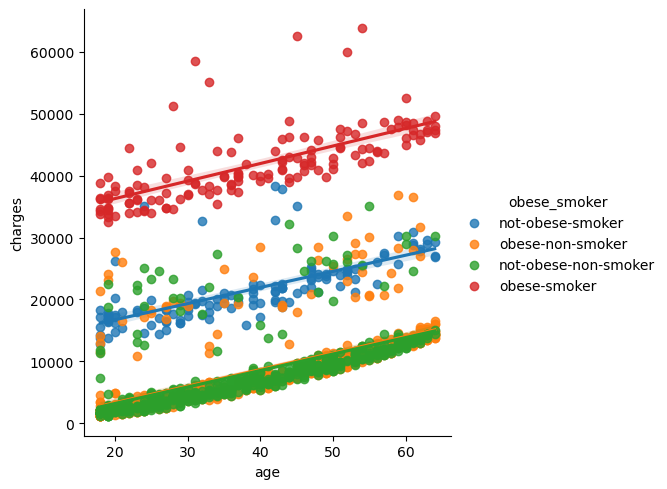

In [11]:
sns.lmplot(data = df, x='age', y='charges', hue='obese_smoker')

In [12]:
df = pd.get_dummies(df, columns=['region'])
df = pd.get_dummies(df, columns=['obese_smoker'])
df

,age,sex,bmi,children,smoker,charges,obese,region_northeast,region_northwest,region_southeast,region_southwest,obese_smoker_not-obese-non-smoker,obese_smoker_not-obese-smoker,obese_smoker_obese-non-smoker,obese_smoker_obese-smoker
0,19,0,27.900,0,1,16884.92400,0,False,False,False,True,False,True,False,False
1,18,1,33.770,1,0,1725.55230,1,False,False,True,False,False,False,True,False
2,28,1,33.000,3,0,4449.46200,1,False,False,True,False,False,False,True,False
3,33,1,22.705,0,0,21984.47061,0,False,True,False,False,True,False,False,False
4,32,1,28.880,0,0,3866.85520,0,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,False,True,False,False,False,False,True,False
1334,18,0,31.920,0,0,2205.98080,1,True,False,False,False,False,False,True,False
1335,18,0,36.850,0,0,1629.83350,1,False,False,True,False,False,False,True,False
1336,21,0,25.800,0,0,2007.94500,0,False,False,False,True,True,False,False,False


In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense

In [14]:
def make_models (df):
    train_dataset = df.sample(frac=0.8 , random_state= 99)
    test_dataset = df.drop(train_dataset.index)
    
    train_labels = train_dataset.pop('charges')
    test_labels = test_dataset.pop('charges')
    
    normalizer = tf.keras.layers.Normalization(axis = -1)
    normalizer.adapt(np.array(train_dataset))
    
    linear_model = tf.keras.Sequential([normalizer , layers.Dense(units=1)])
    
    linear_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss='mean_absolute_error', metrics=['MeanAbsoluteError'])
    
    # setting up deep neural network model
    dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
      ])

    dnn_model.compile(loss='mean_absolute_error', metrics=['MeanAbsoluteError'], optimizer=tf.keras.optimizers.Adam(0.001))

    def train_and_evaluate_model(model):
        # training model using train set
        history = model.fit(
            train_dataset,
            train_labels,
            epochs=100,
            verbose=0,
            # Calculate validation results on 20% of the training data.
            validation_split = 0.2)
        
        # model evaluation and prediction using test set
        loss, mae = model.evaluate(test_dataset, test_labels, verbose=2)
        
        test_predictions = model.predict(test_dataset).flatten()

        # plot predictions
        a = plt.axes(aspect='equal')
        plt.scatter(test_labels, test_predictions)
        plt.xlabel('True values (charges)')
        plt.ylabel('Predictions (charges)')
        lims = [0, 50000]
        plt.xlim(lims)
        plt.ylim(lims)
        _ = plt.plot(lims,lims)
        plt.show()
        
    print('linear model')
    train_and_evaluate_model(linear_model)
    print('dnn model')
    train_and_evaluate_model(dnn_model)



linear model
9/9 - 0s - 15ms/step - MeanAbsoluteError: 13029.0742 - loss: 13029.0742
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


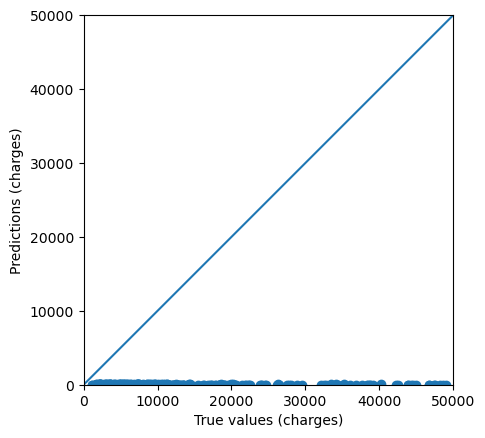

dnn model
9/9 - 0s - 13ms/step - MeanAbsoluteError: 3091.7776 - loss: 3091.7776
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


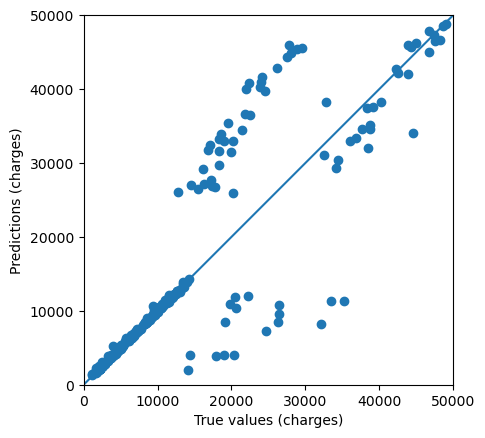

In [15]:
df_original_features=df[['age','sex','bmi','children','smoker','charges','region_northeast','region_northwest','region_southeast','region_southwest']]
make_models(df_original_features)

linear model
9/9 - 0s - 8ms/step - MeanAbsoluteError: 13029.0605 - loss: 13029.0605
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


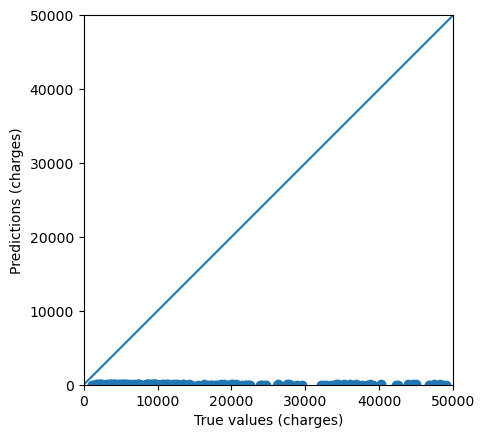

dnn model
9/9 - 0s - 7ms/step - MeanAbsoluteError: 2312.3047 - loss: 2312.3047
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


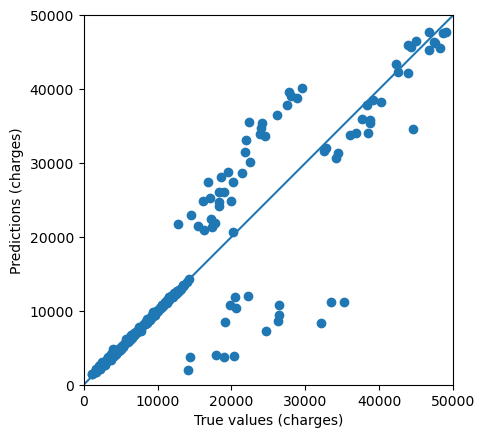

In [16]:
df_add_obese=df[['age','sex','bmi','children','smoker','charges','region_northeast','region_northwest','region_southeast','region_southwest', 'obese']]
make_models(df_add_obese)

linear model
9/9 - 0s - 11ms/step - MeanAbsoluteError: 13028.9443 - loss: 13028.9443
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


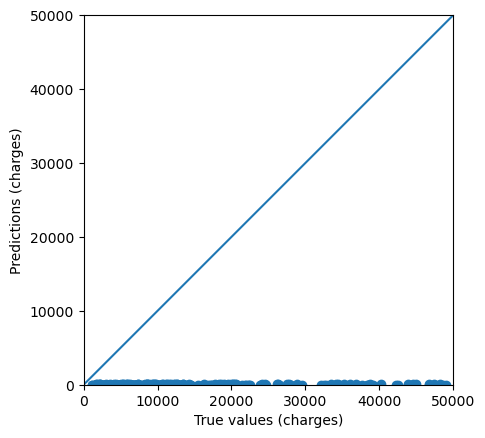

dnn model
9/9 - 0s - 7ms/step - MeanAbsoluteError: 1252.0826 - loss: 1252.0826
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


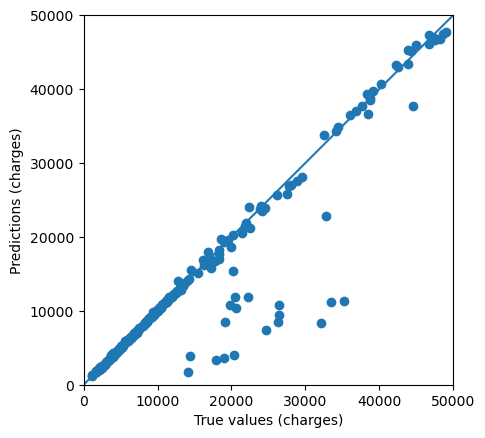

In [17]:
make_models(df)

linear model
9/9 - 0s - 7ms/step - MeanAbsoluteError: 13028.7803 - loss: 13028.7803
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


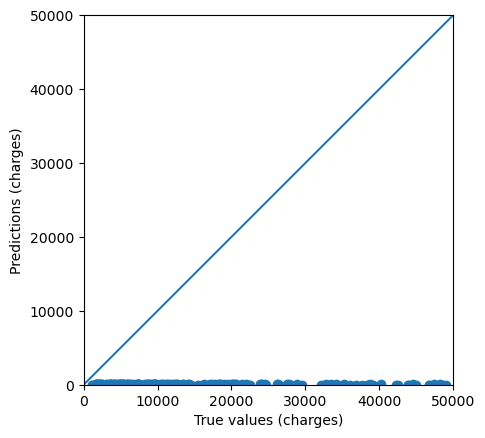

dnn model
9/9 - 0s - 8ms/step - MeanAbsoluteError: 1322.2028 - loss: 1322.2028
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


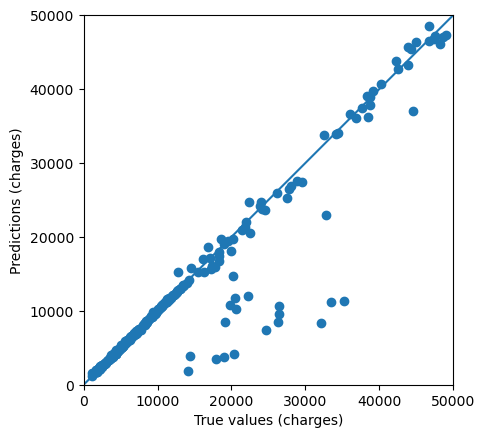

In [18]:
df_drop_obsoletes=df.drop(['smoker','obese'], axis=1)
make_models(df_drop_obsoletes)

linear model
9/9 - 0s - 9ms/step - MeanAbsoluteError: 13028.9746 - loss: 13028.9746
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


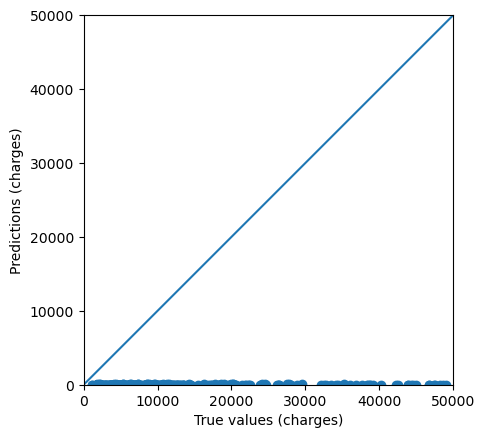

dnn model
9/9 - 0s - 10ms/step - MeanAbsoluteError: 1367.2917 - loss: 1367.2917
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


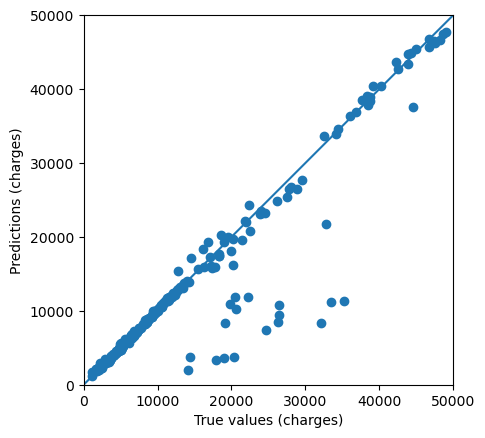

In [19]:
df_drop_more=df.drop(['smoker','obese','region_northeast','obese_smoker_not-obese-non-smoker'], axis=1)
make_models(df_drop_more)

linear model
9/9 - 0s - 8ms/step - MeanAbsoluteError: 13028.9512 - loss: 13028.9512
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


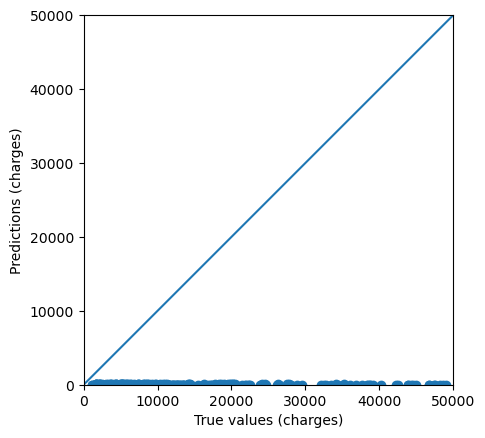

dnn model
9/9 - 0s - 8ms/step - MeanAbsoluteError: 1362.6041 - loss: 1362.6041
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


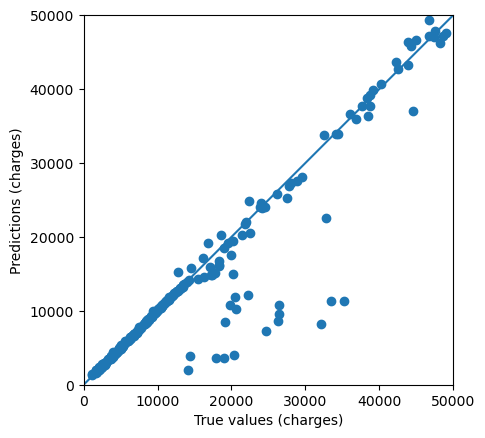

In [20]:
df_drop_more2=df.drop(['obese','smoker','obese_smoker_obese-non-smoker','obese_smoker_not-obese-non-smoker'], axis=1)
make_models(df_drop_more2)

linear model
9/9 - 0s - 9ms/step - MeanAbsoluteError: 13028.9658 - loss: 13028.9658
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


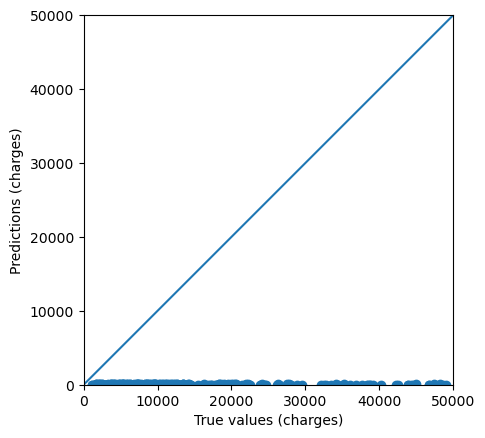

dnn model
9/9 - 0s - 7ms/step - MeanAbsoluteError: 1285.0701 - loss: 1285.0701
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


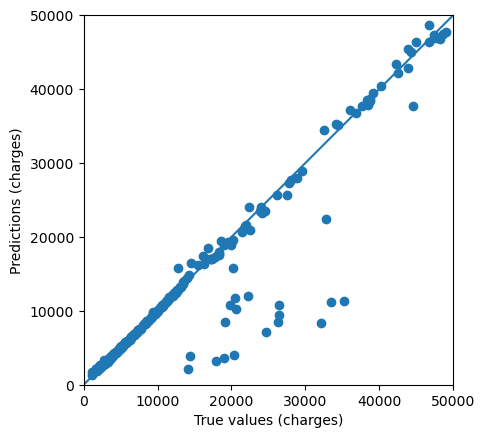

In [21]:
df_age_replaced_by_squared=df.copy()
df_age_replaced_by_squared['age']=df_age_replaced_by_squared['age'].transform(lambda x: x*x)
make_models(df_age_replaced_by_squared)

linear model
9/9 - 0s - 8ms/step - MeanAbsoluteError: 13029.0088 - loss: 13029.0088
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


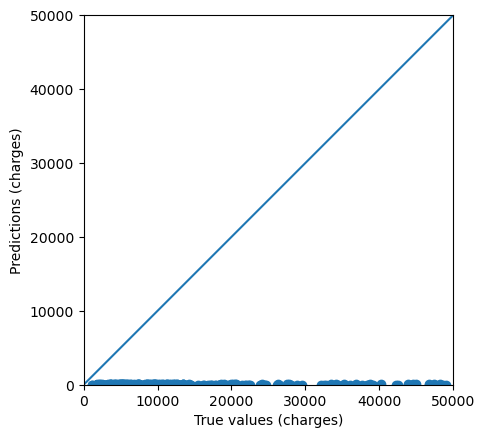

dnn model
9/9 - 0s - 7ms/step - MeanAbsoluteError: 1236.6428 - loss: 1236.6428
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


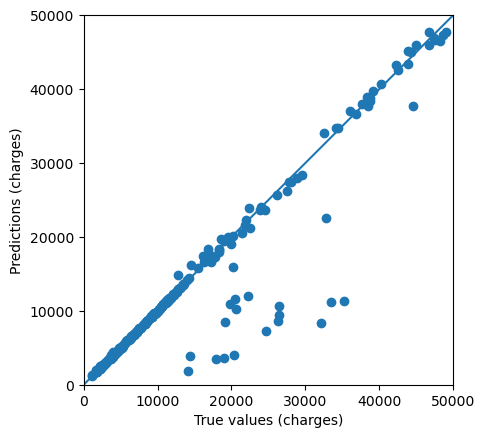

In [22]:
df_add_age_squared=df.copy()
df_add_age_squared['age_squared']=df_add_age_squared['age'].transform(lambda x: x*x)
make_models(df_add_age_squared)